**Econ 353: Money, Banking and Financial Institutions**  

**Project 1 on Time-Series Analysis**  

We are using the CPI monthly data for 4 years 1 month

Data source: https://fred.stlouisfed.org/series/CPIAUCNS



**<span style="color:red;">Objective of the Project:</span>**  

1) Upload a Time-series data set  
2) Visualize the data and report what you find - is there a trend or sesaonal component to it  
3) Check the stationarity of the data and report results  
4) If the data has trend and /or seasonality, decompose the data into trend and/or seasonal component 
5) Visualize the components of the data
6) If the data has trend then de-trend the data
7) If the data has seasonal component then de-seasonalize the data
8) Visualize the de-seasonalized /de-trended data
9) Check stationarity of de-trended data and report results. Make sure the series the stationary before further analysis
10) Forecast using ARIMA modelling
11) Visualize the Forecast

The Notebook below is divided into 11 sections above each section how to complete each analysis, respectively. 

**<span style="color:red;">Apart from completing the code and answering questions following the analysis highlighted in markdown at various places, please also answer the questions in the pdf file outline instructions for the Project</span>**  

**<span style="color:red;">install necessary libraries if not installed</span>**  

In [3]:
#pip install pmdarima

You need to import certain libraries in python whioch you will require for plotting

In [4]:
# Import necessary libraries
import pandas as pd #Pandas is a popular data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing, analysing and manipulating large datasets
import numpy as np #NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # This library is used for plotting
from statsmodels.tsa.stattools import adfuller # this is for ststitical tests like carrying out unit root test, among others
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima # this is for ARIMA forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# Load your time series data (replace 'your_data.csv' with your actual file or data source)
df =              #LOAD THE CSV FILE. NAME OF THE FILE IS "CPI_US_Urban.csv" .complete the code
print(df)
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')



# Set 'Date' as the index
                                      # set date as index - complete the code

       Date      CPI
0   12/1/18  251.233
1    1/1/19  251.712
2    2/1/19  252.776
3    3/1/19  254.202
4    4/1/19  255.548
..      ...      ...
56   8/1/23  307.026
57   9/1/23  307.789
58  10/1/23  307.671
59  11/1/23  307.051
60  12/1/23  306.746

[61 rows x 2 columns]


In [6]:
#print the dataframe


                CPI
Date               
2018-12-01  251.233
2019-01-01  251.712
2019-02-01  252.776
2019-03-01  254.202
2019-04-01  255.548
...             ...
2023-08-01  307.026
2023-09-01  307.789
2023-10-01  307.671
2023-11-01  307.051
2023-12-01  306.746

[61 rows x 1 columns]


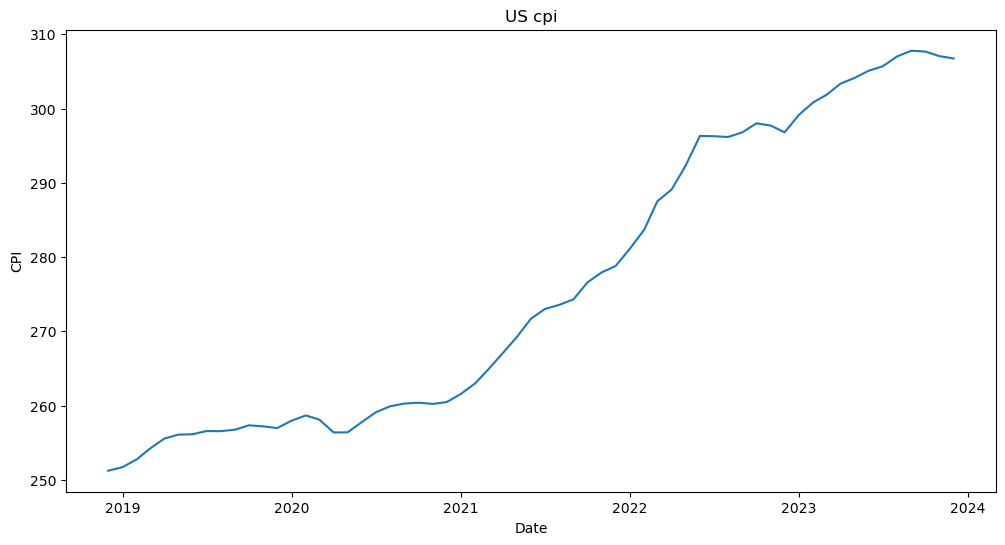

In [7]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
                          #Complete the code for visualizing the series
plt.title('US CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

Explain what you see in the series? Trend, seasonality or both and why?

The Augmented Dickey-Fuller (ADF) test is a statistical test for stationarity. The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series has a unit root, which indicates non-stationarity. The alternative hypothesis is that the time series is stationary.

In [8]:
# Check for stationarity
def stationarity_test(timeseries):
                                    #Write the code for adf test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
stationarity_test(df['CPI'])

ADF Statistic: -0.7261909529409799
p-value: 0.8398483619574348
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}


Interpret the results:



The seasonal_decompose function in statsmodels allows you to decompose a time series into its trend, seasonal, and residual components. The period parameter represents the number of observations per seasonal cycle.

In my case, since the data appears to be monthly, we can set the period parameter to 12 because there are 12 months in a year. If our data has a different frequency, adjust the period accordingly.

In [9]:
# De-compose for trend, seasonality, and residual
decomposition =                   #Complete the code for decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

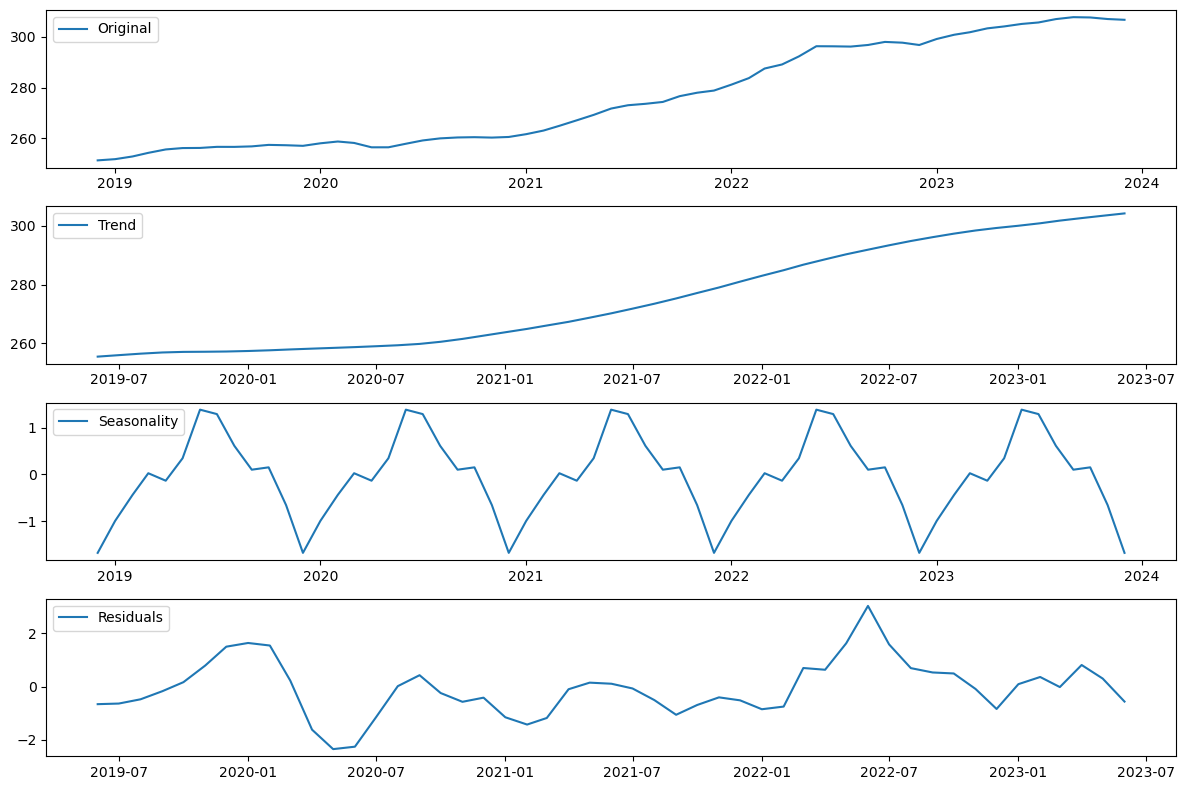

In [10]:
# Visualize components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['CPI'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [11]:
# De-trend by subtracting trend
detrended =                     #Complete the code for creating detrended data



In [12]:
# De-seasonalize by subtracting seasonal component
deseasonalized =  #Complete the code for creating deseasonalized data



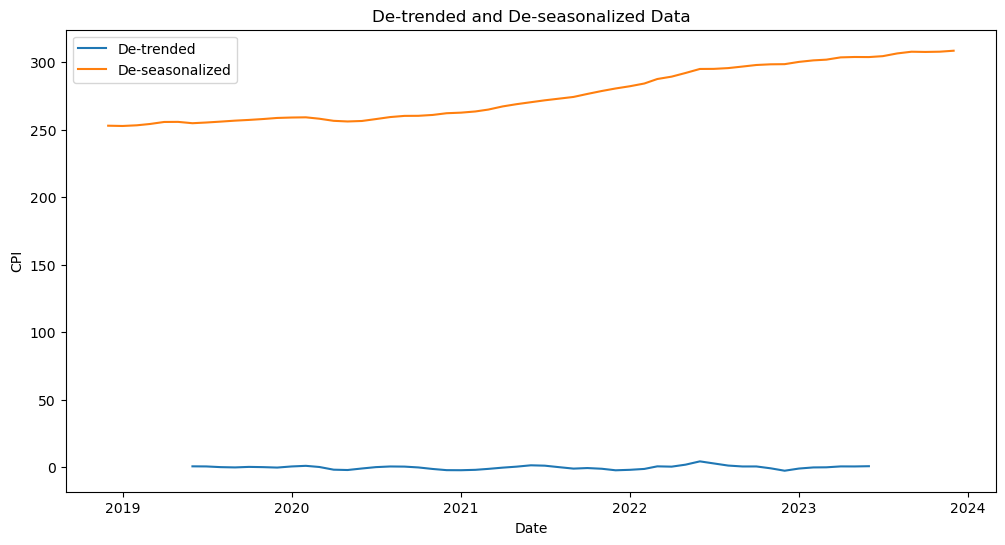

In [13]:
# Visualize de-trended and de-seasonalized data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='De-trended')
plt.plot(deseasonalized, label='De-seasonalized')
plt.legend(loc='upper left')
plt.title('De-trended and De-seasonalized Data')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()



In [14]:
# Check stationarity of de-seasonalized data and complete the code for printing stationary test for de-sesonalized data
 




ADF Statistic: -0.7261909529409799
p-value: 0.8398483619574348
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}


Interpret the results


In [15]:
# Check stationarity of de-trended data
stationarity_test(detrended.dropna())


ADF Statistic: -0.7261909529409799
p-value: 0.8398483619574348
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}


Explain what you find

Log Transformation:

Apply a logarithmic transformation to deasonalised data

In [16]:
df['CPI_log'] =                         #transform the data - take log of deasonalised data: complete the code




Apply first diff

In [17]:
df['CPI_diff'] = df['CPI_log'].diff()
print(df['CPI_diff'])

Date
2018-12-01         NaN
2019-01-01   -0.000812
2019-02-01    0.002005
2019-03-01    0.003793
2019-04-01    0.005908
                ...   
2023-08-01    0.006595
2023-09-01    0.004149
2023-10-01   -0.000547
2023-11-01    0.000612
2023-12-01    0.002330
Name: CPI_diff, Length: 61, dtype: float64


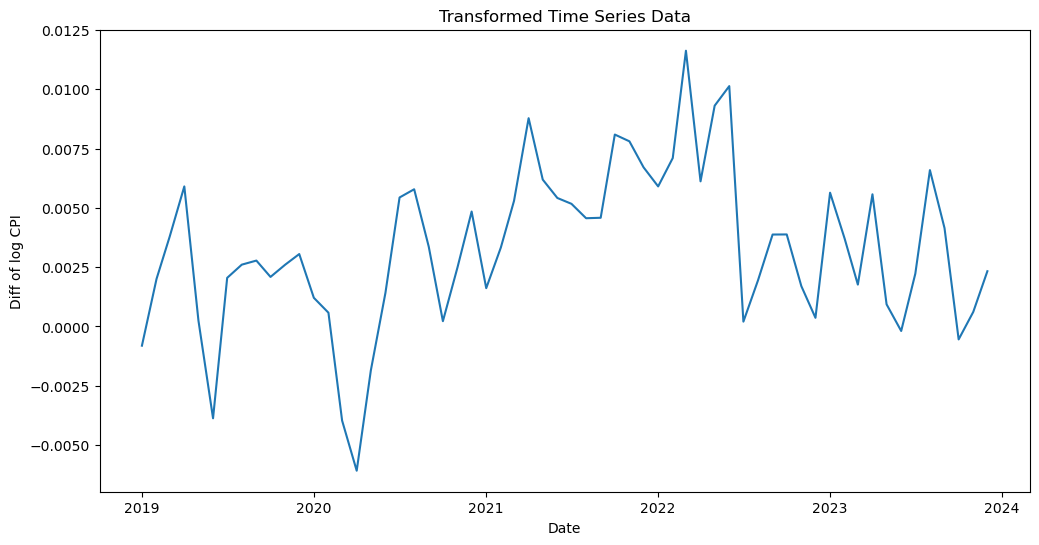

In [18]:
# Visualize the logged time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CPI_diff'])
plt.title('Transformed Time Series Data')
plt.xlabel('Date')
plt.ylabel('Diff of log CPI')
plt.show()

First-differencing data

In [19]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])



In [20]:
df['CPI_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['CPI_diff'].dropna(inplace=True)


In [21]:
# Check stationarity of logged data



ADF Statistic: -1.7290449329125712
p-value: 0.41621318525092477
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


Explain the results. Can we proceed with arima foreasting?

In [22]:
#You can check if a time series has NaN values using the isna() or isnull() method in Pandas. Here's an example:


has_nan = df['CPI_diff'].isna().any()

if has_nan:
    print("The 'CPI_diff' series has NaN values.")
else:
    print("The 'CPI_diff' series does not have NaN values.")


The 'Inflation_diff' series has NaN values.


In [23]:
import pandas as pd
from pmdarima import auto_arima


# Fill NaN values with the mean of the column
df['CPI_diff'].fillna(df['CPI_diff'].mean(), inplace=True)



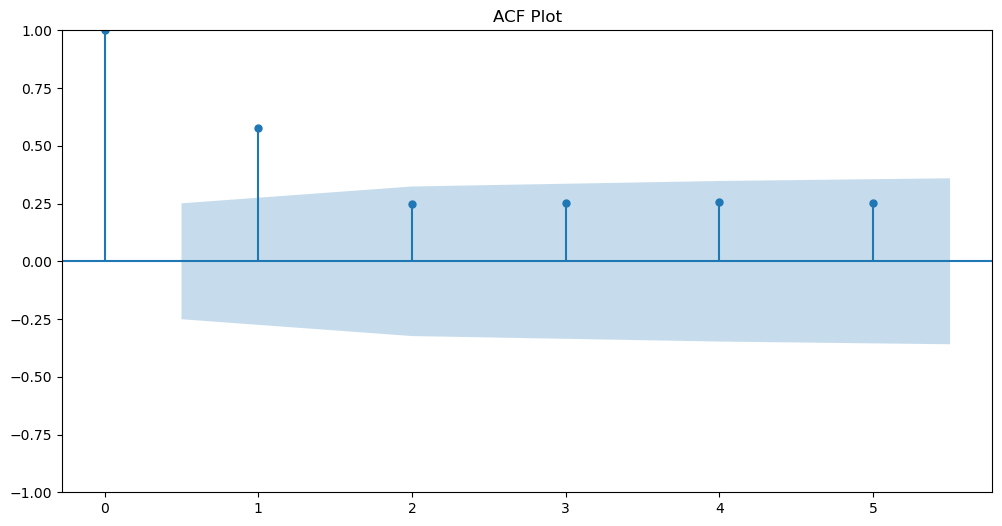

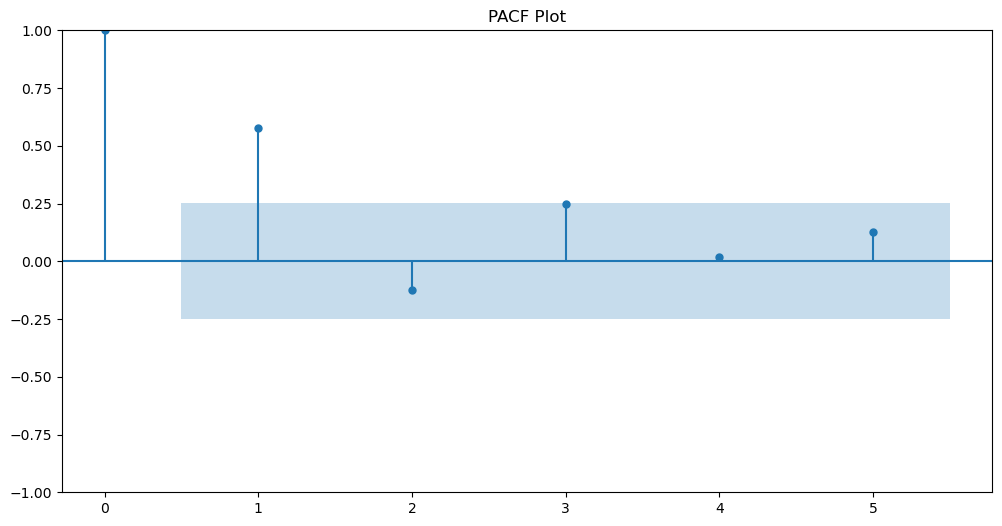

In [24]:
# ACF and PACF plots for determining ARIMA orders  #Complete the code for ACF and PACF PLOT and explain what you find in markdown below the plot
    


Fitting arima model (Method 1)

In the provided code below, the auto_arima function from the pmdarima library is used to automatically find the best ARIMA model (p, d, q) for your time series data. This function performs a grid search over multiple combinations of p, d, and q values and selects the model with the lowest Akaike Information Criterion (AIC).

(0, 0, 1)


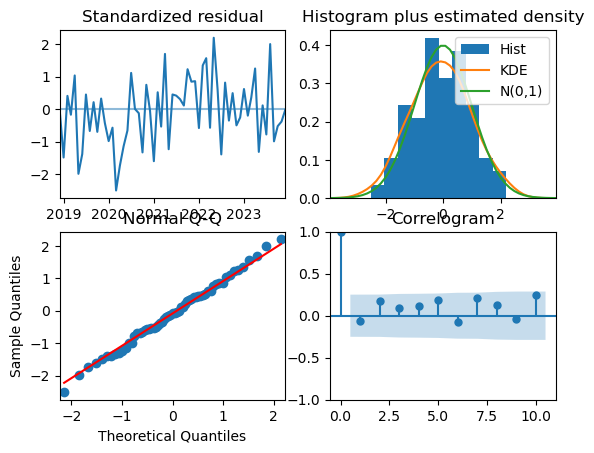

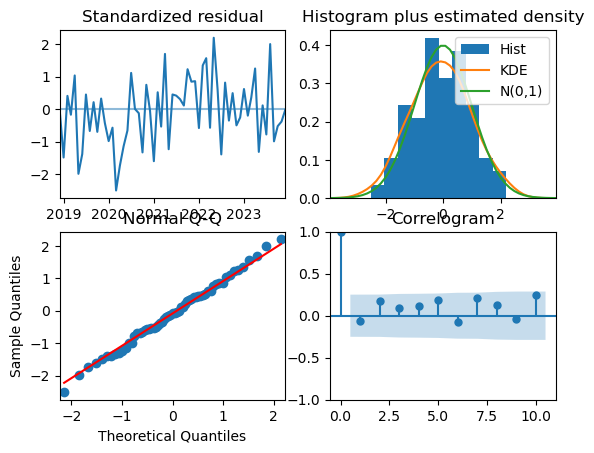

In [25]:
from pmdarima import auto_arima
import pandas as pd

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Perform a grid search for the best ARIMA model on series "CPI_diff". Complete the code below:
model = 
# Display the best model's parameters
print(model.order)


# Fit the best model to the data
model.fit(df['CPI_diff'])



# Print the summary and diagnostic - Complete the two lines of code below for printing model summary and model diagnostics
#Explain what you find in markdown below the model fit and model diagnostics

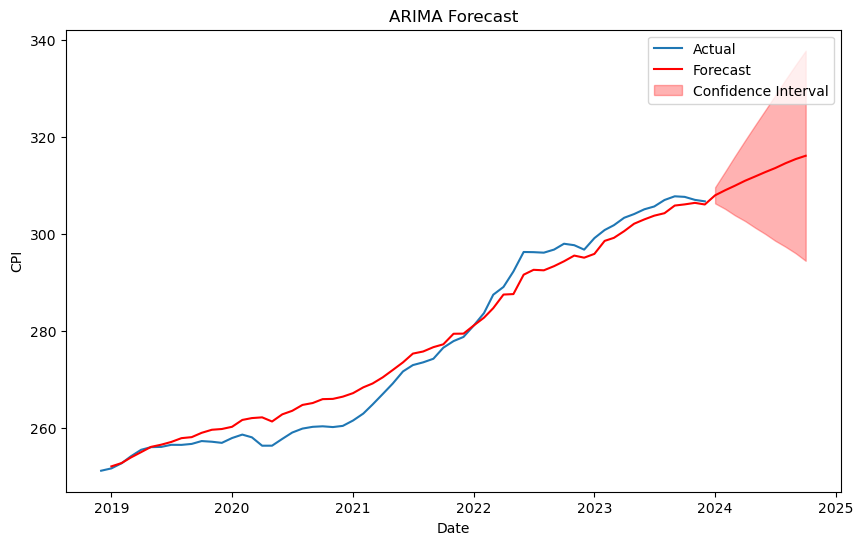

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming 'df' is your time series dataframe with a datetime index and 'CPI' column

model = auto_arima(df['CPI'].diff().dropna(), seasonal=True, m=12, suppress_warnings=True, stepwise=True)

# In-sample forecast
in_sample_forecast, in_sample_conf_int = model.predict_in_sample(return_conf_int=True)

# Reverse the differencing for in-sample forecast
in_sample_forecast_actual = df['CPI'].iloc[0] + in_sample_forecast.cumsum()

# Out-of-sample forecast
n_periods = 10  # Adjust as needed
out_of_sample_forecast, out_of_sample_conf_int =   (n_periods=n_periods, return_conf_int=True)#complete the code
conf_int_actual = pd.DataFrame(out_of_sample_conf_int, columns=['lower', 'upper'], index=pd.date_range(df.index[-1], periods=n_periods, freq='Q'))

# Reverse the differencing for out-of-sample forecast
out_of_sample_forecast_actual = df['CPI'].iloc[-1] + out_of_sample_forecast.cumsum()

# Combine in-sample and out-of-sample forecasts
all_forecast_actual = pd.concat([in_sample_forecast_actual, out_of_sample_forecast_actual])
# Create a DataFrame for confidence intervals with correct indices
conf_int_actual = pd.DataFrame(out_of_sample_conf_int, index=pd.date_range(df.index[-1], periods=n_periods + 1, freq='MS')[1:])

# Reverse the differencing for confidence intervals
conf_int_actual = df['CPI'].iloc[-1] + conf_int_actual.cumsum()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['CPI'], label='Actual')
plt.plot(all_forecast_actual, label='Forecast', color='red')
plt.fill_between(conf_int_actual.index, conf_int_actual.iloc[:, 0], conf_int_actual.iloc[:, 1], color='red', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()



EXPLAIN WHAT YOU FIND- IS YOUR FORECASTING PERFECT? IS THE MODEL YOU CHOOSE PERFECT? CAN YOU EXPLAIN WHY OR WHY NOT IT IS A PERFECT FORECAST

Summarize your findings